# **<span style="color:#FFD580;">US Dataset: Exploratory Data Analysis</span>**

## **Purpose of Notebook**
Conducting a EDA analysis on the loaded and cleaned data, checking numerical stats, distributions, target analysis and geographical views

---

**Import Necessary Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import seaborn as sns
import numpy as np
import plotly.express as px


**Load Clean Dataset**

In [2]:
data = pd.read_csv('/Users/mahnooriqbal/COMP702 Project/ML-AI-Risk-Analysis-AV-Data-/US/US-cleaned_data.csv')
data.head()

,Report ID,Report Version,Make,Model,Model Year,Mileage,ADS Equipped?,Automation System Engaged?,Incident Date,Incident Time (24:00),...,Crash With,Highest Injury Severity Alleged,Property Damage?,SV Pre-Crash Movement,SV Precrash Speed (MPH),Within ODD?,CP Contact Area,Weather,SV Contact Area,Country
0,10003-2800,4,International,LT,2022-01-01,56429.0,No,"Unknown, see Narrative",2025-11-21,19:57:00,...,Other Fixed Object,Unknown,Yes,Proceeding Straight,NaN,"Unknown, see Narrative",Missing,Missing,Front,US
1,10003-2932,1,International,LT,2022-01-01,56429.0,Yes,"Unknown, see Narrative",2021-11-26,19:57:00,...,Other Fixed Object,Unknown,Yes,Proceeding Straight,NaN,"Unknown, see Narrative",Missing,Missing,Front,US
2,10003-3210,1,International,LT625,2021-01-01,78762.0,Yes,"Unknown, see Narrative",2022-04-26,15:52:00,...,Other Fixed Object,No Injuries Reported,Yes,Proceeding Straight,65.0,Yes,Missing,Clear,Front Left,US
3,10003-4179,1,International,LT,2022-01-01,39226.0,No,ADAS,2025-10-22,15:09:00,...,Passenger Car,Unknown,Yes,Proceeding Straight,NaN,"Unknown, see Narrative",Front Right,Clear,Front Left,US
4,10003-6050,2,International,LT625,2022-01-01,NaN,No,"Unknown, see Narrative",2025-12-22,08:20:00,...,Other Fixed Object,No Injuries Reported,Yes,Proceeding Straight,55.0,"Unknown, see Narrative",Missing,Clear,"Rear Left, Left, Front Left, Front, Rear Right...",US


In [3]:
# Print all column names in the dataset
print("All Columns in the Dataset:")
for col in data.columns:
    print(col)

All Columns in the Dataset:
Report ID
Report Version
Make
Model
Model Year
Mileage
ADS Equipped?
Automation System Engaged?
Incident Date
Incident Time (24:00)
City
State
Roadway Type
Roadway Surface
Roadway Description
Posted Speed Limit (MPH)
Lighting
Crash With
Highest Injury Severity Alleged
Property Damage?
SV Pre-Crash Movement
SV Precrash Speed (MPH)
Within ODD?
CP Contact Area
Weather
SV Contact Area
Country


**Split the Numerical and Catergorical Columns**

In [4]:
# Identify numerical and categorical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
catergorical_columns = [
    'Make', 'Model', 'Model Year', 'ADS Equipped?',
    'Automation System Engaged?', 'City', 'State', 'Roadway Type', 'Roadway Surface',
    'Roadway Description', 'Lighting', 'Crash With', 'Highest Injury Severity Alleged',
    'SV Pre-Crash Movement', 'CP Contact Area', 'Weather', 'SV Contact Area', 'Country'
]
datetime_columns = ['Incident Date', 'Incident Time (24:00)']

# Print the identified columns
print(f"\nNumerical columns: {numerical_columns}")
print(f"\nCategorical columns: {catergorical_columns}")
print(f"\nDatetime columns: {datetime_columns}")



Numerical columns: ['Report Version', 'Mileage', 'Posted Speed Limit (MPH)', 'SV Precrash Speed (MPH)']

Categorical columns: ['Make', 'Model', 'Model Year', 'ADS Equipped?', 'Automation System Engaged?', 'City', 'State', 'Roadway Type', 'Roadway Surface', 'Roadway Description', 'Lighting', 'Crash With', 'Highest Injury Severity Alleged', 'SV Pre-Crash Movement', 'CP Contact Area', 'Weather', 'SV Contact Area', 'Country']

Datetime columns: ['Incident Date', 'Incident Time (24:00)']


## **<span style="color:lightblue;">Univariate Analysis</span>**

**Numerical Summary and Boxplots**

In [5]:
# Create a summary table for numerical columns
summary_table = PrettyTable()
summary_table.field_names = ["Column", "Mean", "Median", "Mode", "Min", "Max", "Std Dev"]

for column in numerical_columns:
    col_data = data[column].dropna()  # Drop NaN values for calculations
    if not col_data.empty:  # Ensure the column is not empty
        mean = col_data.mean()
        median = col_data.median()
        mode = col_data.mode().iloc[0] if not col_data.mode().empty else "N/A"
        min_val = col_data.min()
        max_val = col_data.max()
        std_dev = col_data.std()
        summary_table.add_row([column, mean, median, mode, min_val, max_val, std_dev])
    else:
        summary_table.add_row([column, "N/A", "N/A", "N/A", "N/A", "N/A", "N/A"])

print(summary_table)

+--------------------------+--------------------+---------+--------+-----+-----------+--------------------+
|          Column          |        Mean        |  Median |  Mode  | Min |    Max    |      Std Dev       |
+--------------------------+--------------------+---------+--------+-----+-----------+--------------------+
|      Report Version      | 1.3906678865507778 |   1.0   |   1    |  1  |     9     | 0.6160254538730963 |
|         Mileage          | 39173.27400581959  | 25493.0 | 1111.0 | 0.0 | 1150344.0 | 51537.66803086138  |
| Posted Speed Limit (MPH) | 43.23735810113519  |   40.0  |  25.0  | 0.0 |    80.0   | 18.02783246446883  |
| SV Precrash Speed (MPH)  | 28.06357947434293  |   22.0  |  0.0   | 0.0 |   925.0   | 32.368797804526885 |
+--------------------------+--------------------+---------+--------+-----+-----------+--------------------+


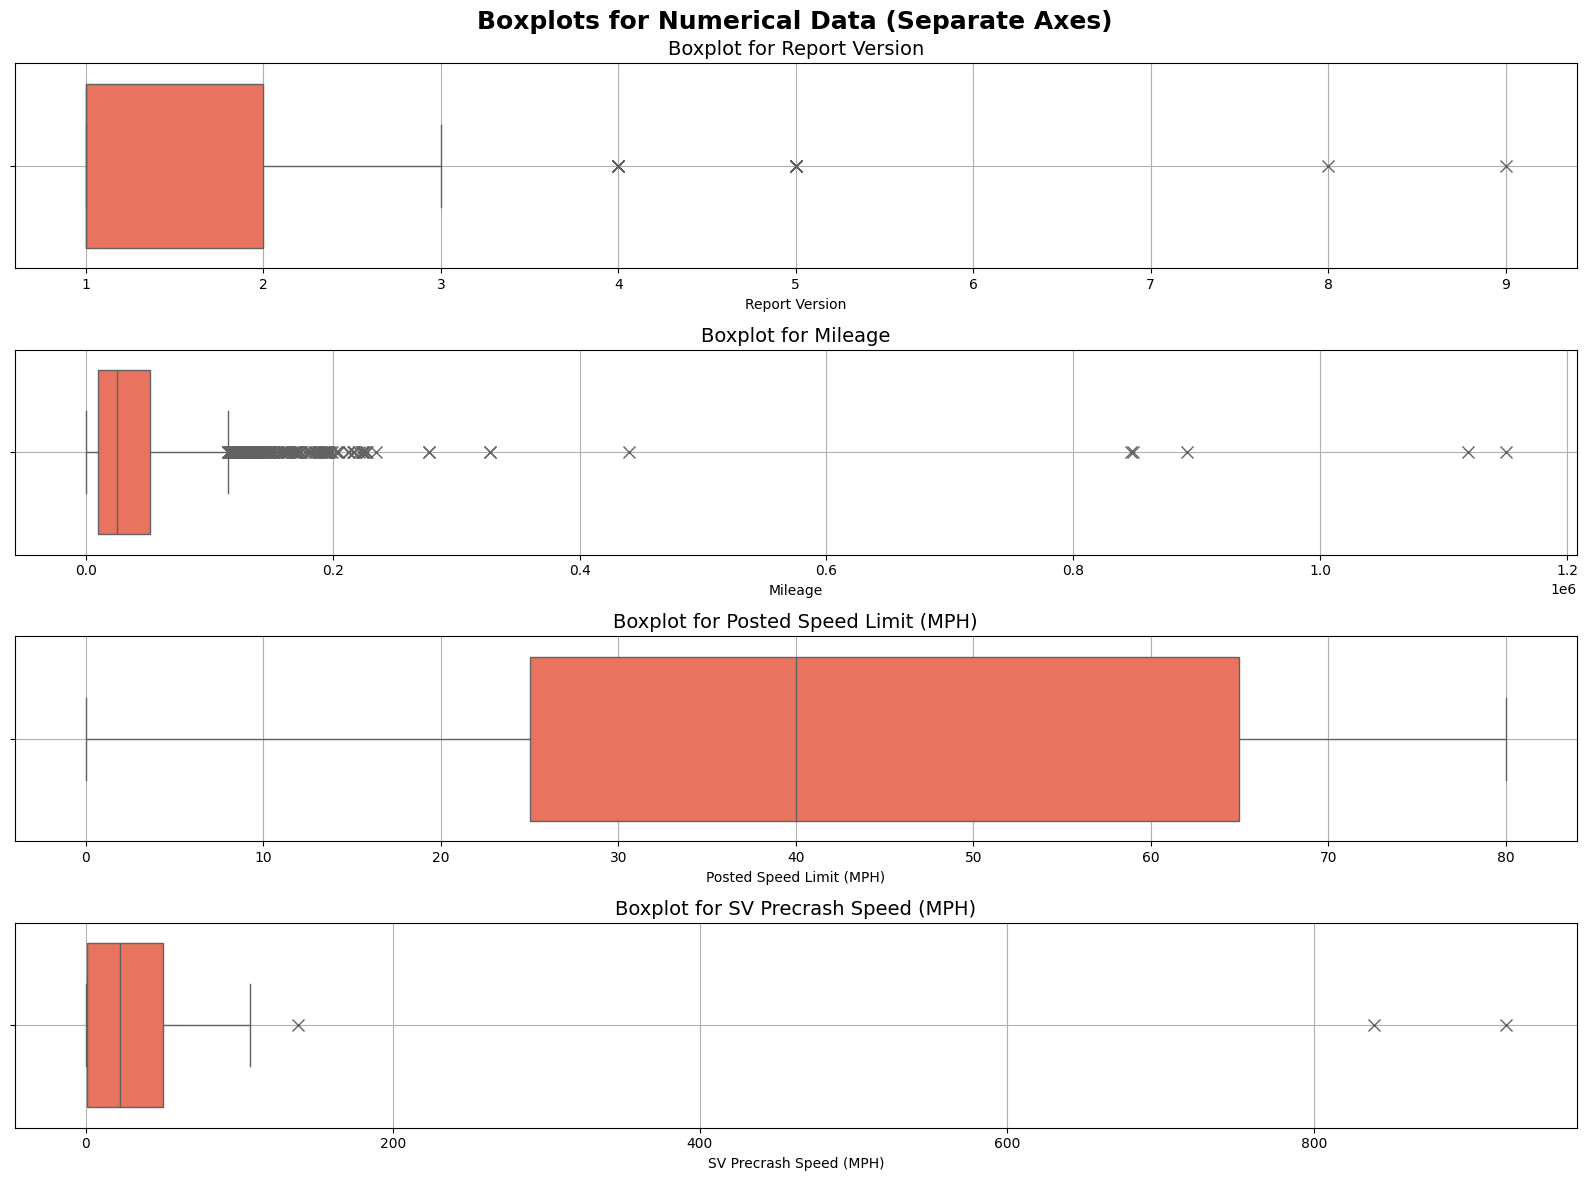

In [6]:
# Numerical Data: Boxplots for each column separately
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(16, 12))  # Create a 2x2 grid for 4 numerical columns
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=data, x=col, color='tomato', ax=axes[i],
                flierprops=dict(marker='x', markersize=8))
    axes[i].set_title(f"Boxplot for {col}", fontsize=14)
    axes[i].grid(True)  # Add grid for better visualization

# Remove empty plots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Delete unused axes

# Super title for the whole plot
plt.suptitle("Boxplots for Numerical Data (Separate Axes)", fontsize=18, fontweight=800)
plt.tight_layout()
plt.show()

**Catergorical Columns pi charts plots**

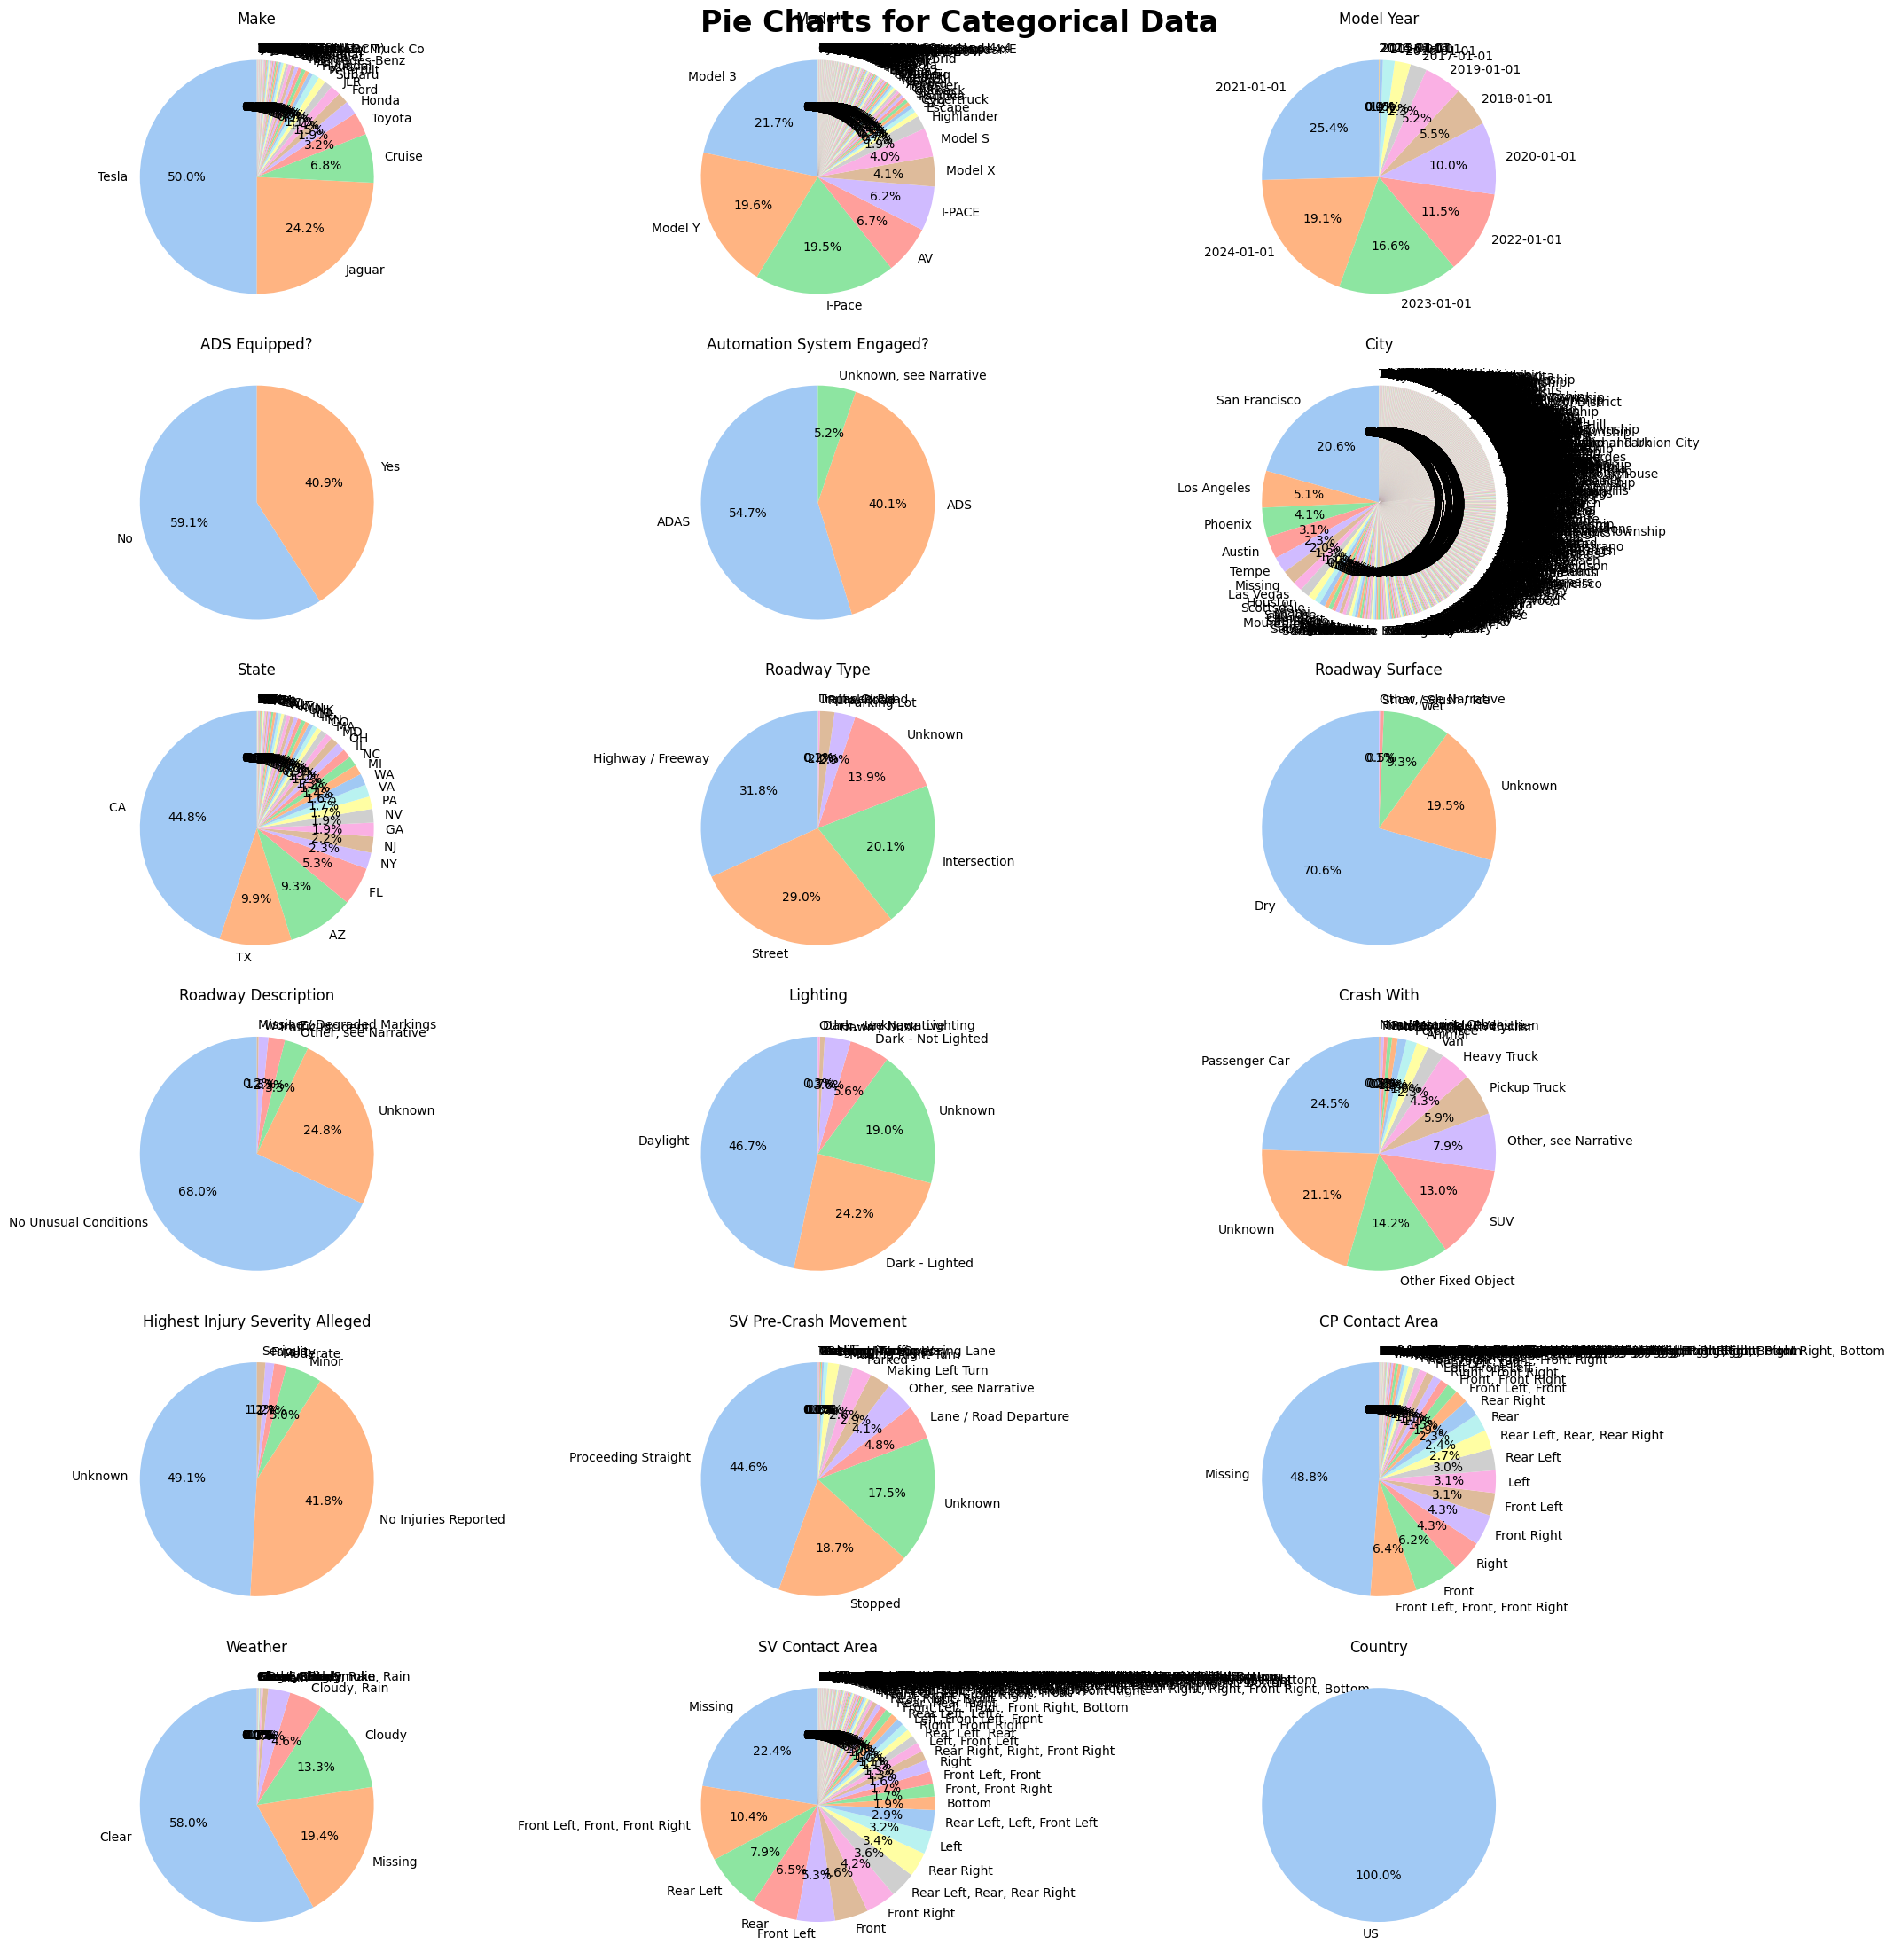

In [7]:
# Generate pie charts for all categorical columns
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(20, 30))  # Adjusted for 23 categorical columns
axes = axes.flatten()

for i, col in enumerate(catergorical_columns):
    col_data = data[col].value_counts()  # Count occurrences of each category
    col_data.plot.pie(
        ax=axes[i],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel'),
        textprops={'fontsize': 10}
    )
    axes[i].set_title(col, fontsize=12)
    axes[i].set_ylabel('')  # Remove y-axis label for better visualization

# Remove empty plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Delete unused axes

# Super title for the whole plot
plt.suptitle("Pie Charts for Categorical Data", fontsize=24, fontweight=800)
plt.tight_layout()
plt.show()

**Histogram Distributions**

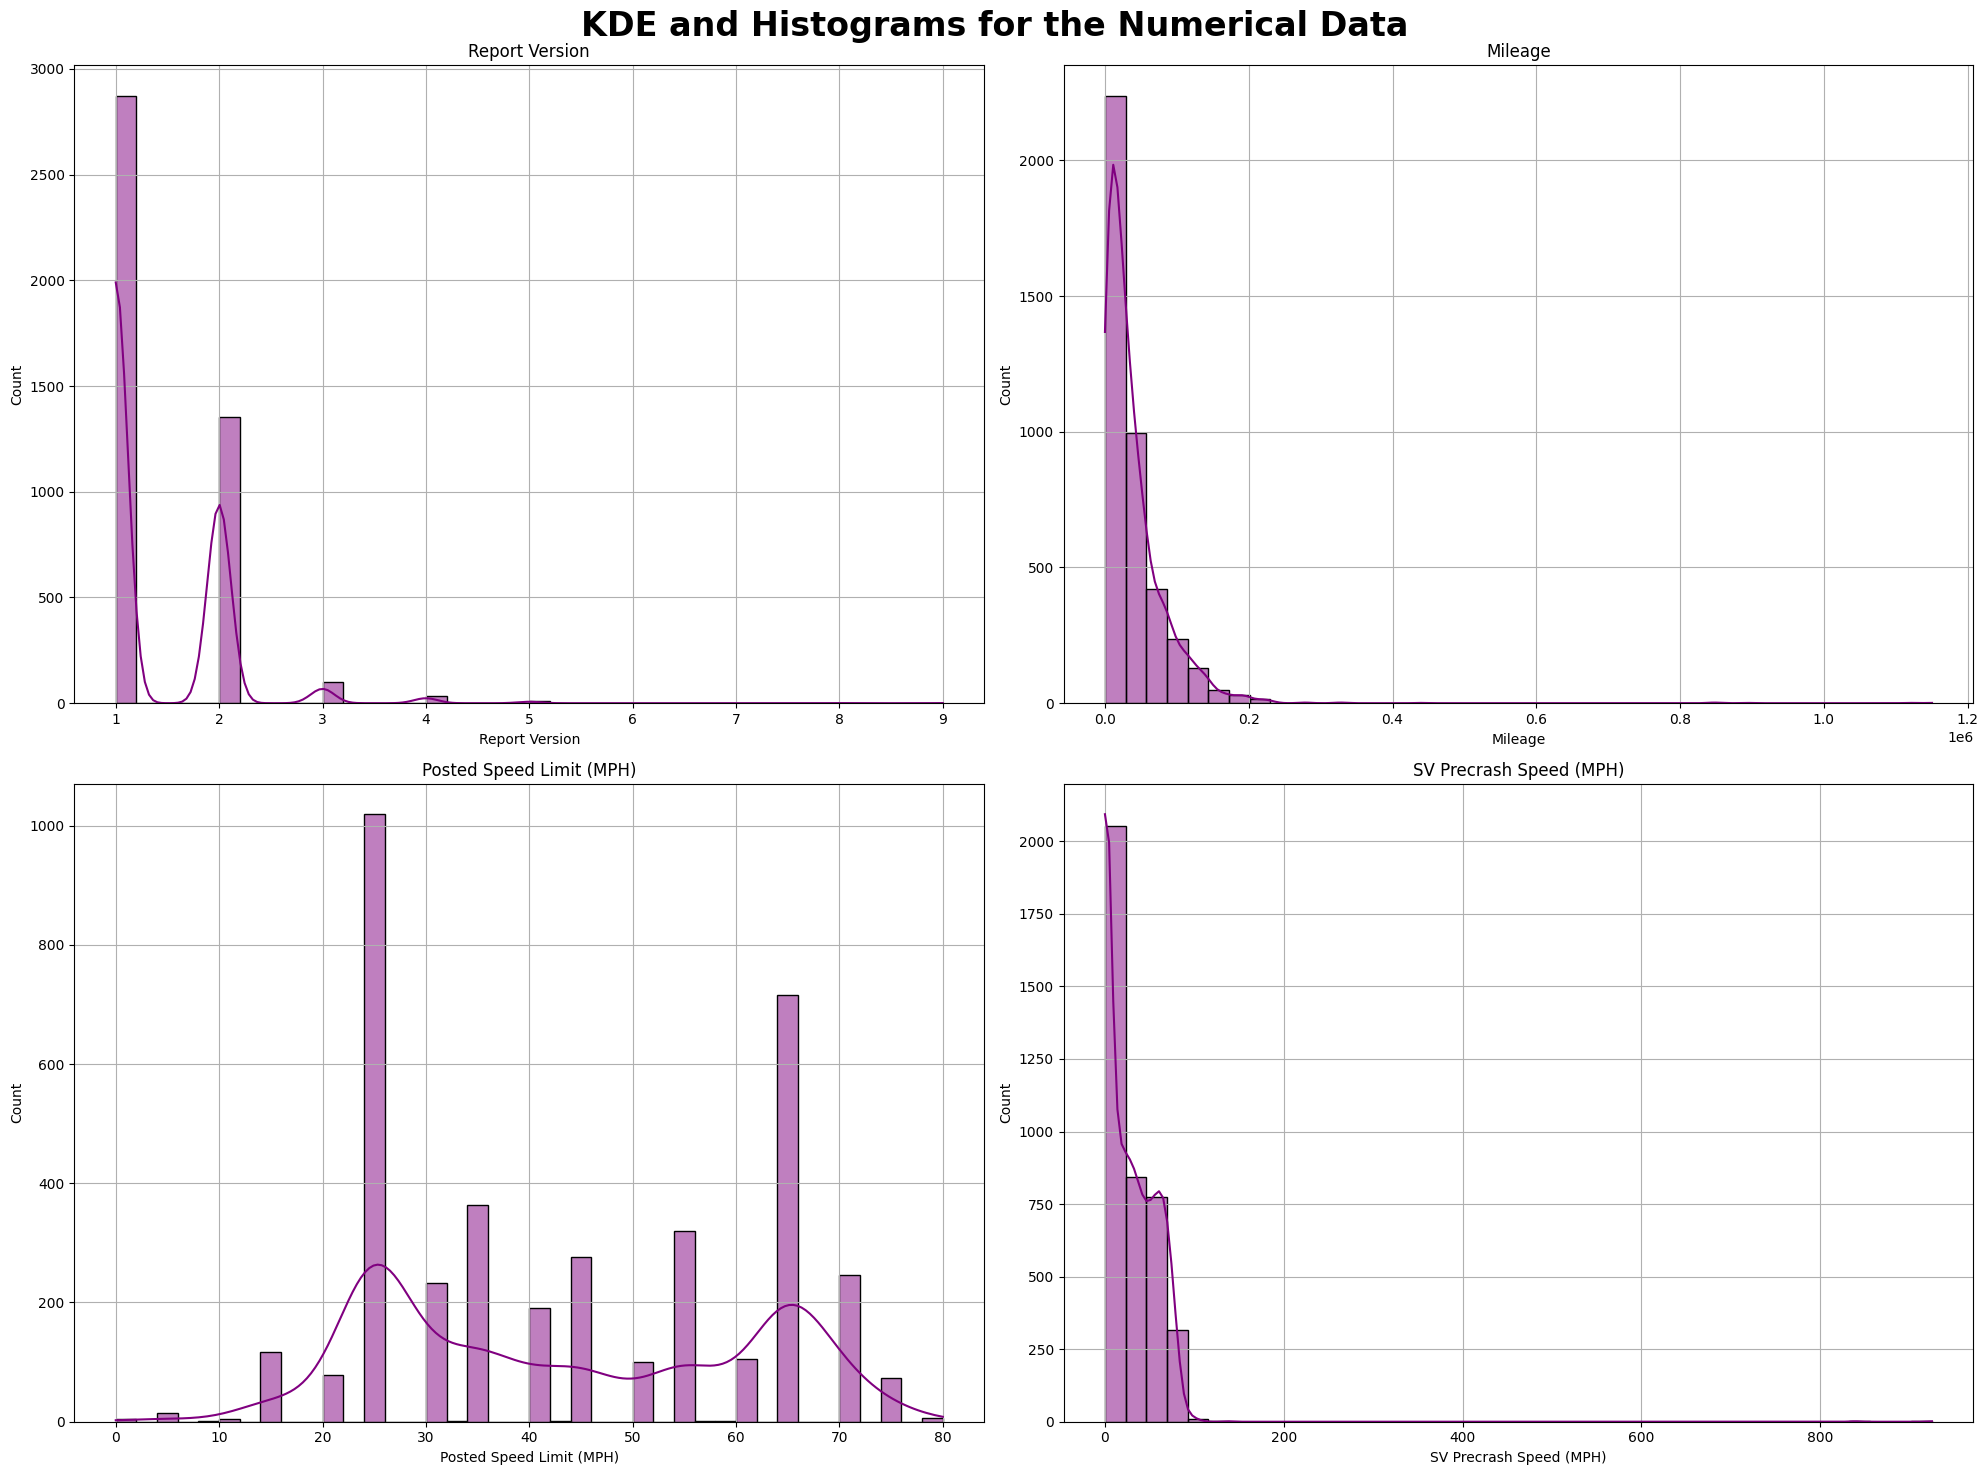

In [8]:
# Numerical Data: KDE and Histogram
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))  # Adjusted for 4 numerical columns
axes = axes.flatten()
for i, col in enumerate(numerical_columns):  # Plot each numerical column histogram
    sns.histplot(data[col].dropna(), bins=40, kde=True, color='purple', edgecolor='black', ax=axes[i])
    axes[i].set_title(col)
    axes[i].grid(True)  # Add grid for better visualization

# Remove empty plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Delete unused axes

# Super title for the whole plot
plt.suptitle("KDE and Histograms for the Numerical Data", fontsize=24, fontweight=800)
plt.tight_layout()
plt.show()


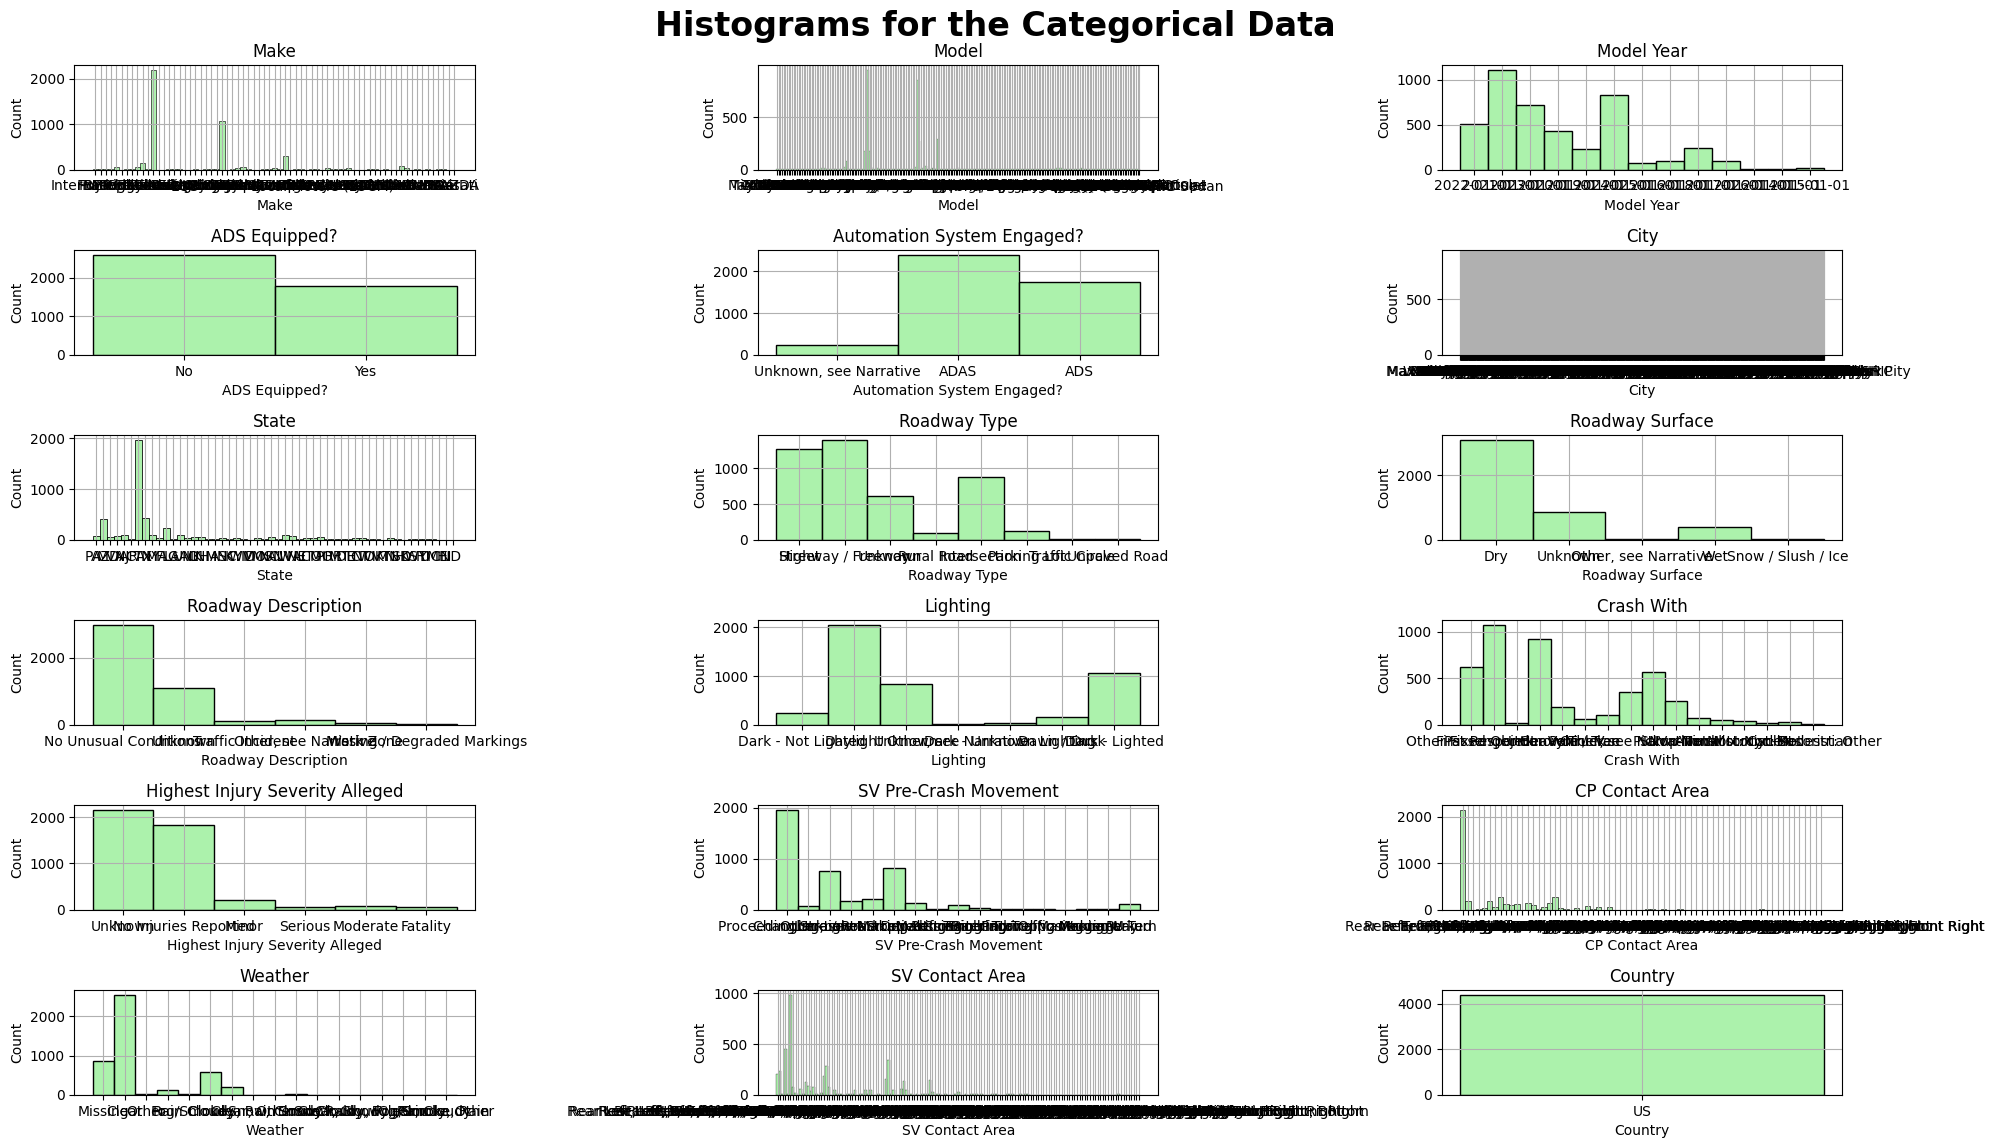

In [9]:
# Categorical Data: Histogram distributions
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(20, 15))  # Adjusted for 23 categorical columns
axes = axes.flatten()
for i, col in enumerate(catergorical_columns):
    sns.histplot(data[col].dropna(), kde=False, color='lightgreen', edgecolor='black', ax=axes[i])
    axes[i].set_title(col)
    axes[i].grid(True)

# Remove empty plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Delete unused axes

# Super title for the whole plot
plt.suptitle("Histograms for the Categorical Data", fontsize=24, fontweight=800)
plt.tight_layout()
plt.show()

**Time Distrubution**

NameError: name 'counts' is not defined

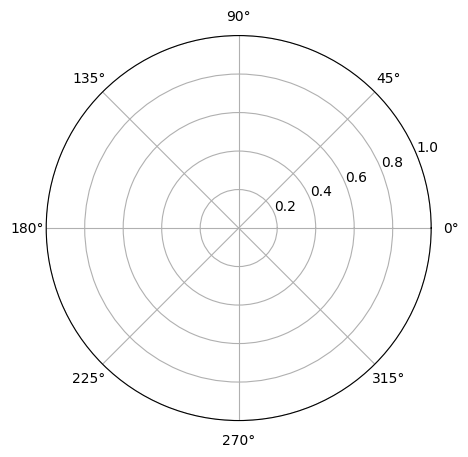

In [10]:
# Create radial plot with pastel colors and 00:00 at the top
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': 'polar'})
theta = np.linspace(0.0, 2 * np.pi, 24, endpoint=False)  # Angles for each hour
bars = ax.bar(theta, counts, width=2 * np.pi / 24, bottom=0.0, color=sns.color_palette('pastel'), edgecolor='black')

# Adjust the orientation to make 00:00 at the top
ax.set_theta_zero_location("N")  # Set 0 degrees (00:00) to the top
ax.set_theta_direction(-1)  # Set clockwise direction

# Set labels and title
ax.set_xticks(theta)
ax.set_xticklabels([f'{hour}:00' for hour in hours])
ax.set_title('Radial Plot of Incident Time Distribution', va='bottom', fontsize=14)

plt.show()


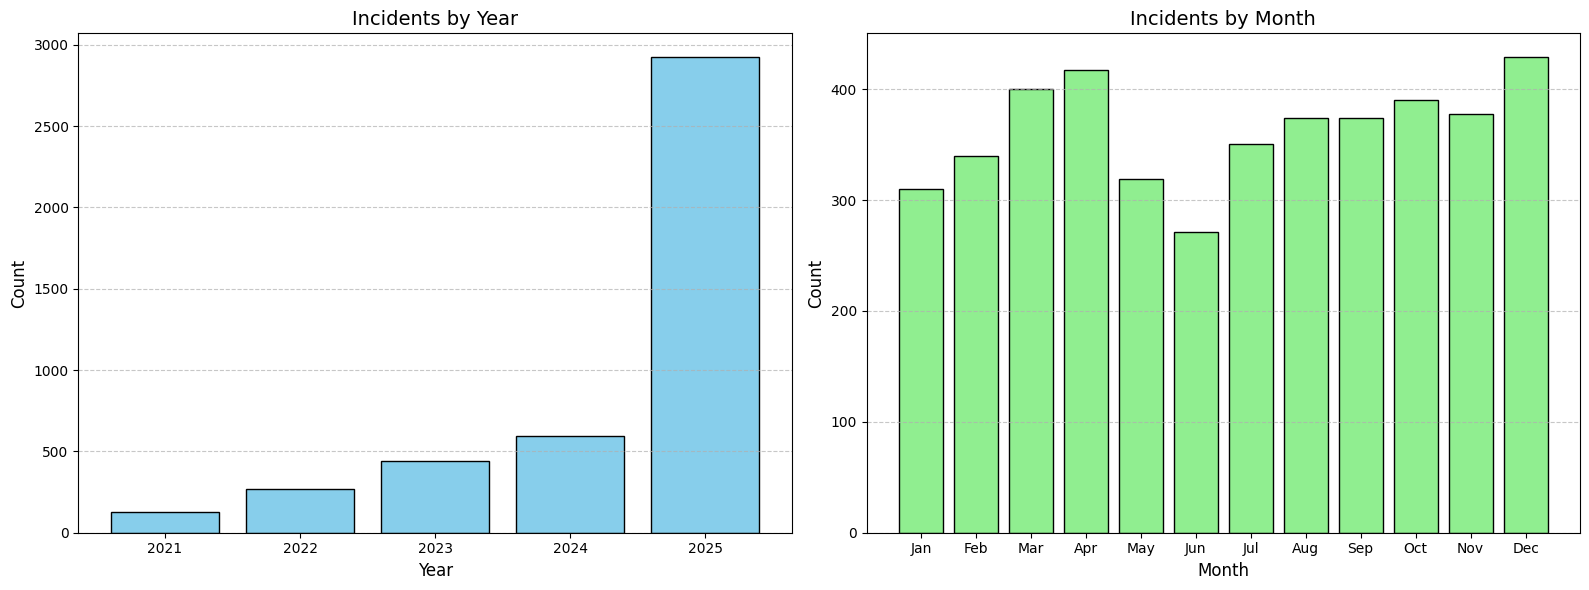

In [ ]:
# Extract year and month from the 'Incident Date' column
data['Incident Year'] = pd.to_datetime(data['Incident Date'], errors='coerce').dt.year
data['Incident Month'] = pd.to_datetime(data['Incident Date'], errors='coerce').dt.month

# Count occurrences for each year and month
year_counts = data['Incident Year'].value_counts().sort_index()
month_counts = data['Incident Month'].value_counts().sort_index()

# Plot bar charts for year and month
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Bar chart for years
axes[0].bar(year_counts.index, year_counts.values, color='skyblue', edgecolor='black')
axes[0].set_title('Incidents by Year', fontsize=14)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Bar chart for months
axes[1].bar(month_counts.index, month_counts.values, color='lightgreen', edgecolor='black')
axes[1].set_title('Incidents by Month', fontsize=14)
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### **Summary**
- accidents ocurring in peak times 
- need to normalise contact area data
- A lot of unknown for severity
- more adas accidents
---

## **<span style="color:lightblue;">Bivariate Analysis</span>**

**Visualisation with Target Variable Severity**

<Figure size 800x600 with 0 Axes>

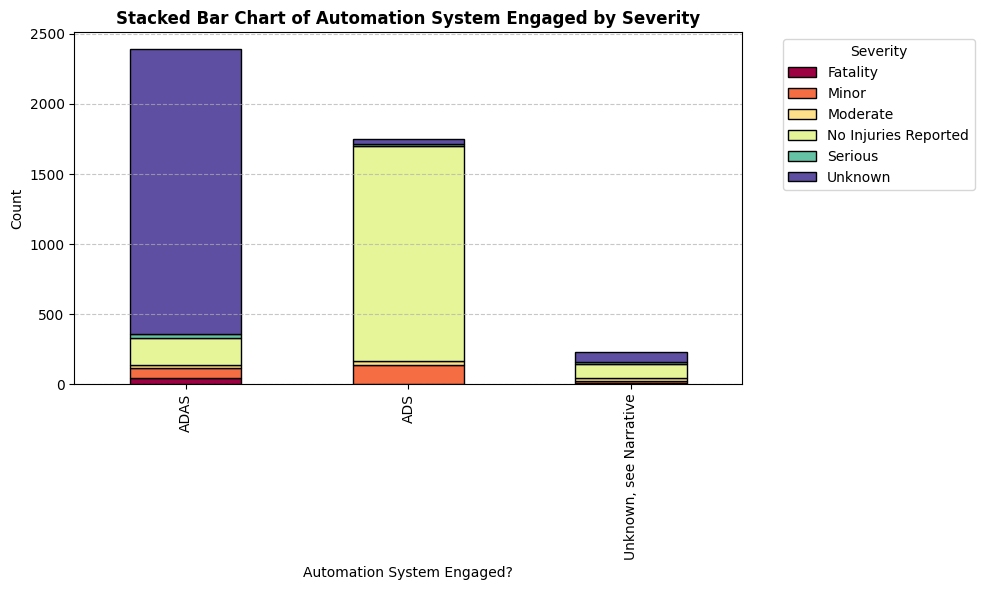

In [ ]:
# Stacked bar chart: Count of Automation System Engaged by Severity
plt.figure(figsize=(8, 6))  # Adjusted figure size for better visibility
autonomous_severity = data.groupby(['Automation System Engaged?', 'Highest Injury Severity Alleged']).size().unstack()
autonomous_severity.plot(kind='bar', stacked=True, colormap='Spectral', edgecolor='black', figsize=(10, 6))

plt.title('Stacked Bar Chart of Automation System Engaged by Severity', fontweight=800)
plt.xlabel('Automation System Engaged?')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Dashed grid for better readability
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
plt.tight_layout()
plt.show()


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

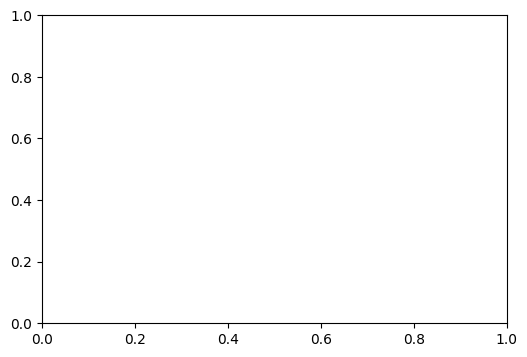

In [ ]:
# KDE plot: Grade distribution by weather
plt.figure(figsize=(6, 4))
sns.kdeplot(data=data, x='Weather', hue='Highest Injury Severity Alleged', fill=True, palette='Set1')
plt.title('Grade Distribution - Weather', fontweight=800)
plt.xlabel('Weather')
plt.ylabel('Density')
plt.grid(True, linestyle='--')  # Dashed grid for plot
plt.show()

In [ ]:
# Bar chart: Count of passed and failed
plt.figure(figsize=(6, 4)) #figure is nice and small but you can still it clearly
sns.countplot(x='Weather', hue='Highest Injury Severity Alleged', data=data, palette='Spectral') #nice spectral colour pallete
plt.title('Count of Weather by Severity', fontweight=800)
plt.xlabel('Weather')
plt.ylabel('Count')
plt.grid(True, linestyle='--')  #dashed grid for plot
plt.show()

# Scatter plot: Correlation between grade and absences
plt.figure(figsize=(6, 4))
sns.scatterplot(x='absences', y='Grade', data=data, hue='Highest Injury Severity Alleged', palette='RdYlGn', s=100, edgecolor='black')
plt.title("Correlation Between Grade and Absences", fontweight=800)
plt.xlabel('Absences')
plt.ylabel('Grade')
plt.grid(True, linestyle='--')  #dashed grid for plot
plt.show()

# Bar chart: Count of passed and failed students by study time
plt.figure(figsize=(6, 4))
sns.countplot(x='studytime', hue='Highest Injury Severity Alleged', data=data, palette='Greens')
plt.title('Count of Passed and Failed Students by Study Time', fontweight=800)
plt.xlabel('Study Time')
plt.ylabel('Count')
plt.grid(True, linestyle='--')  #dashed grid for plot
plt.show()

# Scatter chart: stacking grades for each school and the grades on side 
plt.figure(figsize=(6, 4))
sns.scatterplot(x='age', y='Grade', hue='Highest Injury Severity Alleged', data=data, palette='PRGn_r', s=100, edgecolor='black')
plt.title('Grades by Age and School', fontweight=800)
plt.xlabel('Age')
plt.ylabel('Grade')
plt.grid(True, linestyle='--')   #dashed grid for plot
plt.show()

# KDE plot: Grade distribution by alcohol consumption on weekends
plt.figure(figsize=(6, 4))
sns.kdeplot(data=data, x='Walc', hue='Highest Injury Severity Alleged', fill=True, palette='Set1')
plt.title('Grade Distribution - Alcohol Consumption (Weekends)', fontweight=800)
plt.xlabel('Weekend Alcohol Consumption')
plt.ylabel('Density')
plt.grid(True, linestyle='--')  #dashed grid for plot
plt.show()

# Boxplot: Weekend alcohol consumption (Walc) for each age
plt.figure(figsize=(6, 4))
sns.boxplot(x='age', hue='Highest Injury Severity Alleged', y='Walc', data=data, palette='Set3')
plt.title('Weekend Alcohol Consumption by Age', fontweight=800)
plt.xlabel('Age')
plt.ylabel('Weekend Alcohol Consumption')
plt.grid(True, linestyle='--')   #dashed grid for plot
plt.show()

# Scatter plot: Grade and commute time by address (Urban/Rural)
plt.figure(figsize=(6, 4))
sns.scatterplot(x='traveltime', y='Grade', hue='Highest Injury Severity Alleged', data=data, palette='bwr', s=100, edgecolor='black')
plt.title('Grade and Commute Time by Address (Urban/Rural)', fontweight=800)
plt.xlabel('Commute Time (hours)')
plt.ylabel('Grade')
plt.grid(True, linestyle='--')  #dashed grid for plot
plt.show()

#### **Summary**
- 
---

## **<span style="color:lightblue;">Outlier Detection</span>**

#### **Summary**
- 
---

## **<span style="color:lightblue;">Geographical Analysis</span>**

In [ ]:
"""
    Reference: https://plotly.com/python/county-choropleth/
"""
# Clean the 'State' column to ensure proper formatting
state_counts['State'] = state_counts['State'].str.strip().str.upper()

# Create a choropleth map
fig = px.choropleth(
    state_counts,
    locations='State',
    locationmode='USA-states',
    color='Count',
    color_continuous_scale='Blues',
    scope='usa',
    title='Choropleth Map of US States by City Count'
)

# Show the map
fig.show()


**Cities in California**

IndexError: index 0 is out of bounds for axis 0 with size 0

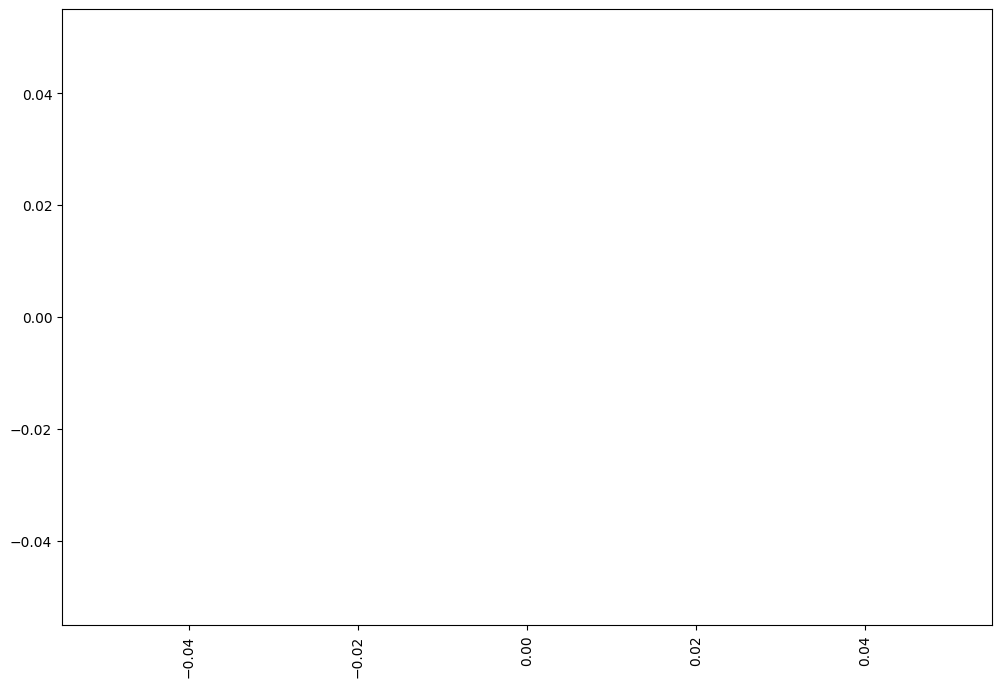

#### **Summary**
- 
---

# NEXT NOTEBOOK IS NORMALISING ETC


## **<span style="color:lightblue;">Correlation Heatmaps</span>**

#### **Summary**
- 
---

## **<span style="color:lightblue;">Sampling</span>**

#### **Summary**
- 
---

In [ ]:
read